In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#Load the datasets into Dataframes
healthy_data = pd.read_csv("healthy.txt",delimiter="\t",header=0)
cancer_data = pd.read_csv("cancer.txt",delimiter="\t",header=0)
healthy_df = pd.DataFrame(healthy_data)
cancer_df = pd.DataFrame(cancer_data)

In [3]:
print(healthy_df.shape)
healthy_df.head(5)

(19648, 52)


,Hugo_Symbol,Entrez_Gene_Id,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,TCGA-77-8007,...,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
0,HIST3H2A,92815,62.12,130.60,33.06,35.50,73.03,60.39,92.05,66.65,...,90.77,59.55,40.07,22.92,29.91,82.29,4.70,37.32,43.63,77.25
1,LIN7B,64130,185.11,283.05,119.26,169.07,165.57,161.02,131.51,198.47,...,185.11,119.26,102.97,123.50,264.03,194.36,166.73,105.15,185.11,356.05
2,LXN,56925,909.17,819.30,412.00,743.43,1340.84,607.87,1709.26,1709.26,...,813.63,2400.97,543.96,2193.99,540.19,521.76,253.23,764.36,518.15,878.17
3,CNKSR2,22866,41.81,18.29,40.93,67.12,54.72,29.27,20.26,23.76,...,34.51,70.01,57.49,57.89,67.12,34.51,22.10,31.90,28.24,49.91
4,SCML1,6322,133.36,214.27,108.14,109.66,190.34,211.31,96.01,208.38,...,251.48,209.84,120.10,109.66,155.50,162.14,277.20,86.43,164.42,155.50


In [4]:
print(cancer_df.shape)
cancer_df.head(5)

(19648, 52)


,Hugo_Symbol,Entrez_Gene_Id,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,TCGA-77-8007,...,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
0,HIST3H2A,92815,336.79,500.46,703.28,287.01,486.75,70.51,145.02,14.03,...,3.06,420.68,109.66,106.63,1233.75,172.65,303.44,228.13,251.48,23.59
1,LIN7B,64130,105.15,212.78,102.25,212.78,172.65,244.57,105.89,152.28,...,135.24,135.24,151.22,395.18,295.11,120.94,114.36,96.68,277.20,153.34
2,LXN,56925,848.22,236.21,271.48,759.08,61.25,620.67,329.84,599.49,...,688.78,204.07,438.59,503.95,3039.30,607.87,106.63,507.46,255.00,346.29
3,CNKSR2,22866,32.59,8.51,45.85,6.16,49.21,11.91,12.27,15.00,...,1.38,6.62,6.11,1.66,33.54,3.11,0.82,3.32,27.25,6.16
4,SCML1,6322,84.63,74.58,67.12,57.89,102.97,132.44,66.65,57.08,...,165.57,119.26,87.65,53.57,232.94,67.12,64.80,90.14,198.47,154.42


In [5]:
#Replace all zero values with NAN
healthy_df.replace(0,np.nan,True)
cancer_df.replace(0,np.nan,True)
#Drop all Rows with NAN values over 50% 
healthy_df.dropna(0,'any',healthy_df.columns[2:].size/2,inplace=True)
cancer_df.dropna(0,'any',cancer_df.columns[2:].size/2,inplace=True)

print("Healthy Rows:",healthy_df.shape[0])
print("Cancer Rows:",cancer_df.shape[0])

Healthy Rows: 17773
Cancer Rows: 17895


In [6]:
#Take only common rows in both dataframes
filtered_healthy_df,filtered_cancer_df = healthy_df.align(cancer_df,join='inner',axis=0)
filtered_healthy_df.reset_index(drop=True,inplace=True)
filtered_cancer_df.reset_index(drop=True,inplace=True)
#Replace all NAN values with zero
filtered_healthy_df.replace(np.nan,0,True)
filtered_cancer_df.replace(np.nan,0,True)

print("Healthy Rows: ",filtered_healthy_df.shape[0])
print("Cancer Rows: ",filtered_cancer_df.shape[0])

Healthy Rows:  17459
Cancer Rows:  17459


In [7]:
#Calculate Correlation Coefficient
corr_coeff = [stats.pearsonr(h_row[1][2:],c_row[1][2:])[0] for h_row,c_row in zip(filtered_healthy_df.iterrows(),filtered_cancer_df.iterrows())]

In [8]:
#Create a new Dataframe with Correlation Coefficients
corr_coeff_df = pd.DataFrame(corr_coeff,columns=['corr_coeff'])
corr_coeff_df.insert(0,'Hugo_Symbol',filtered_healthy_df['Hugo_Symbol'])
corr_coeff_df.sort_values(by=['corr_coeff'],inplace=True,ascending=False)
corr_coeff_df.head(5)

,Hugo_Symbol,corr_coeff
10911,AREGB,0.969044
5417,OR7D2,0.930574
13514,GUCA1A,0.878029
6634,MTRNR2L2,0.847577
17108,NUTM2E,0.826948


In [9]:
max_gene = corr_coeff_df.head(1)
min_gene = corr_coeff_df.tail(1)
print(max_gene)
print(min_gene)

      Hugo_Symbol  corr_coeff
10911       AREGB    0.969044
      Hugo_Symbol  corr_coeff
13070     FAM222B   -0.452807


Text(0.5, 0.98, 'Genes with the Highest and Lowest Correlation Coefficient')

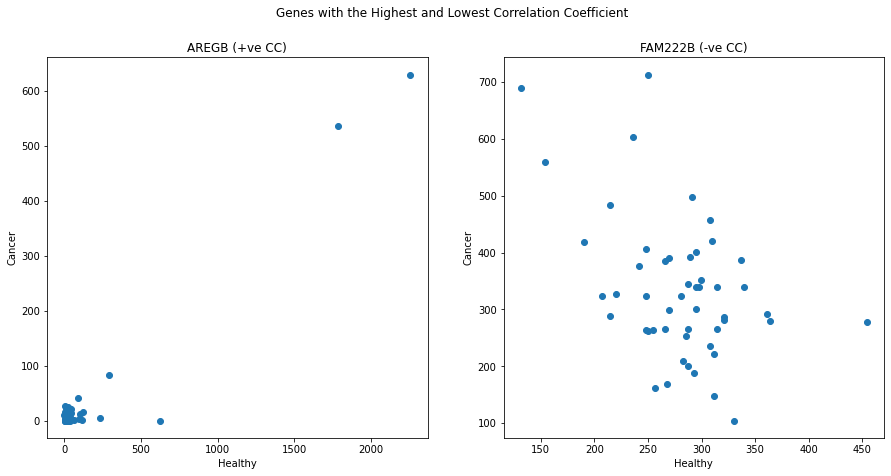

In [10]:
#Plot Genes with most +ve and -ve correlation coeficient
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,7))

ax1.scatter(filtered_healthy_df.iloc[[max_gene['Hugo_Symbol'].index[0]],2:],filtered_cancer_df.iloc[[max_gene['Hugo_Symbol'].index[0]],2:])
ax1.set(ylabel="Cancer",xlabel="Healthy",title="{} (+ve CC)".format(max_gene['Hugo_Symbol'].iloc[0]))

ax2.scatter(filtered_healthy_df.iloc[[min_gene['Hugo_Symbol'].index[0]],2:],filtered_cancer_df.iloc[[min_gene['Hugo_Symbol'].index[0]],2:])
ax2.set(ylabel="Cancer",xlabel="Healthy",title="{} (-ve CC)".format(min_gene['Hugo_Symbol'].iloc[0]))

fig.suptitle("Genes with the Highest and Lowest Correlation Coefficient")

Paired Samples

In [11]:
#Calculate p-values in case of paired samples
p_values_paired = [stats.ttest_rel(h_row[1][2:],c_row[1][2:]).pvalue for h_row,c_row in zip(filtered_healthy_df.iterrows(),filtered_cancer_df.iterrows())]

In [12]:
p_values_paired_df = pd.DataFrame(p_values_paired,columns=['p_value'])
p_values_paired_df.insert(0,'Hugo_Symbol',filtered_healthy_df['Hugo_Symbol'])
p_values_paired_df.head(5)

,Hugo_Symbol,p_value
0,HIST3H2A,4.043607e-08
1,LIN7B,2.891646e-01
2,LXN,2.322367e-04
3,CNKSR2,3.420577e-12
4,SCML1,6.251346e-02


In [13]:
# Apply FDR Correction
from statsmodels.stats.multitest import multipletests
fdr_correction = multipletests(p_values_paired_df['p_value'],alpha=0.05,method='fdr_bh')
p_values_paired_df["p_value_correction"] = fdr_correction[1]
p_values_paired_df["p_value_result"] = p_values_paired_df['p_value'].apply(lambda val: val <  0.05)
p_values_paired_df["p_value_correction_result"] = fdr_correction[0]
p_values_paired_df.head(5)

,Hugo_Symbol,p_value,p_value_correction,p_value_result,p_value_correction_result
0,HIST3H2A,4.043607e-08,1.461642e-07,True,True
1,LIN7B,2.891646e-01,3.366356e-01,False,False
2,LXN,2.322367e-04,4.609095e-04,True,True
3,CNKSR2,3.420577e-12,2.470826e-11,True,True
4,SCML1,6.251346e-02,8.378157e-02,False,False


In [14]:
#Genes before correction 
deg_paired_df = p_values_paired_df[p_values_paired_df["p_value_result"] == True][["Hugo_Symbol"]]
print(deg_paired_df.shape)
deg_paired_df.head()

(12787, 1)


,Hugo_Symbol
0,HIST3H2A
2,LXN
3,CNKSR2
6,GSDMD
7,AKR1C1


In [15]:
#Genes after correction
deg_paired_corrected_df = p_values_paired_df[p_values_paired_df["p_value_correction_result"] == True][["Hugo_Symbol"]]
print(deg_paired_corrected_df.shape)
deg_paired_corrected_df.head()

(12469, 1)


,Hugo_Symbol
0,HIST3H2A
2,LXN
3,CNKSR2
6,GSDMD
7,AKR1C1


Independent Samples

In [16]:
#Calculate p-values in case of independent samples
p_values_independent = [stats.ttest_ind(h_row[1][2:],c_row[1][2:]).pvalue for h_row,c_row in zip(filtered_healthy_df.iterrows(),filtered_cancer_df.iterrows())]

In [17]:
p_values_independent_df = pd.DataFrame(p_values_independent,columns=['p_value'])
p_values_independent_df.insert(0,'Hugo_Symbol',filtered_healthy_df['Hugo_Symbol'])
p_values_independent_df.head(5)

,Hugo_Symbol,p_value
0,HIST3H2A,3.607140e-09
1,LIN7B,3.138295e-01
2,LXN,8.164044e-05
3,CNKSR2,6.374652e-15
4,SCML1,4.726590e-02


In [18]:
# Apply FDR Correction
fdr_correction = multipletests(p_values_independent_df['p_value'],alpha=0.05,method='fdr_bh')
p_values_independent_df["p_value_correction"] = fdr_correction[1]
p_values_independent_df["p_value_result"] = p_values_independent_df['p_value'].apply(lambda val: val <  0.05)
p_values_independent_df["p_value_correction_result"] = fdr_correction[0]
p_values_independent_df.head(5)

,Hugo_Symbol,p_value,p_value_correction,p_value_result,p_value_correction_result
0,HIST3H2A,3.607140e-09,1.385939e-08,True,True
1,LIN7B,3.138295e-01,3.639663e-01,False,False
2,LXN,8.164044e-05,1.728967e-04,True,True
3,CNKSR2,6.374652e-15,5.070389e-14,True,True
4,SCML1,4.726590e-02,6.521895e-02,True,False


In [19]:
#Genes before correction 
deg_independent_df = p_values_independent_df[p_values_independent_df["p_value_result"] == True][["Hugo_Symbol"]]
print(deg_independent_df.shape)
deg_independent_df.head()

(12694, 1)


,Hugo_Symbol
0,HIST3H2A
2,LXN
3,CNKSR2
4,SCML1
6,GSDMD


In [20]:
#Genes after correction
deg_independent_corrected_df = p_values_paired_df[p_values_independent_df["p_value_correction_result"] == True][["Hugo_Symbol"]]
print(deg_independent_corrected_df.shape)
deg_independent_corrected_df.head()

(12380, 1)


,Hugo_Symbol
0,HIST3H2A
2,LXN
3,CNKSR2
6,GSDMD
7,AKR1C1
